In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preprocessing

In [3]:
train_df = pd.read_csv('train.csv')

# Display basic information about the dataset
print("Dataset Shape:", train_df.shape)
print("\nFirst 5 rows:")
display(train_df.head())

Dataset Shape: (31, 13)

First 5 rows:


,DATE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,265900,177570,889140,202833,******,915949,554372,128212,267803,115043,619722,506035
1,2,823141,737744,886529,161209,168524,235952,252192,377253,315068,******,133089,334811
2,3,358882,525224,750171,506256,970249,833495,236912,254528,848007,376453,507742,723784
3,4,107873,350822,506100,392107,904183,519665,194682,622939,298935,506852,281146,325526
4,5,177277,586971,959785,994936,499424,472138,501811,724506,649722,790019,770782,829065


In [4]:
train_df = train_df.replace('******', 0)
train_df = train_df.apply(pd.to_numeric)
train_df.head()

,DATE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,265900,177570,889140,202833,0,915949,554372,128212,267803,115043,619722,506035
1,2,823141,737744,886529,161209,168524,235952,252192,377253,315068,0,133089,334811
2,3,358882,525224,750171,506256,970249,833495,236912,254528,848007,376453,507742,723784
3,4,107873,350822,506100,392107,904183,519665,194682,622939,298935,506852,281146,325526
4,5,177277,586971,959785,994936,499424,472138,501811,724506,649722,790019,770782,829065


In [5]:
# Reshape the data from wide to long format
cleaned_df = train_df.melt(id_vars=['DATE'], 
                           var_name='MONTH', 
                           value_name='NUMBER')

# Create a proper date column using a safer method
def create_date(row):
    # Use the first day of each month with year 2024
    return pd.to_datetime(f"2024-{row['MONTH']}-{int(row['DATE'])}", errors='coerce')

cleaned_df['DATE'] = cleaned_df.apply(create_date, axis=1)

# Drop any rows with invalid dates (if any)
cleaned_df = cleaned_df.dropna(subset=['DATE'])

# Select only the relevant columns
cleaned_df = cleaned_df[['DATE', 'NUMBER']]

# Sort by date
cleaned_df = cleaned_df.sort_values('DATE').reset_index(drop=True)


In [6]:
cleaned_df.head(124)

,DATE,NUMBER
0,2024-01-01,265900
1,2024-01-02,823141
2,2024-01-03,358882
3,2024-01-04,107873
4,2024-01-05,177277
...,...,...
119,2024-04-29,479772
120,2024-04-30,720388
121,2024-05-01,0
122,2024-05-02,168524


In [7]:
def split_digits(number):
    return [int(d) for d in str(number).zfill(6)]

# Function to categorize digits
def categorize_digit(digit):
    if digit == 0:
        return 'zero'
    return 'even' if digit % 2 == 0 else 'odd'

# Create new columns for individual digits
digit_columns = ['digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6']
cleaned_df[digit_columns] = cleaned_df['NUMBER'].apply(
    lambda x: pd.Series(split_digits(x))
)

# Create categorical columns for each digit
for i, col in enumerate(digit_columns, start=1):
    cleaned_df[f'cat_{i}'] = cleaned_df[col].apply(categorize_digit)

In [8]:
cleaned_df.head()

,DATE,NUMBER,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6
0,2024-01-01,265900,2,6,5,9,0,0,even,even,odd,odd,zero,zero
1,2024-01-02,823141,8,2,3,1,4,1,even,even,odd,odd,even,odd
2,2024-01-03,358882,3,5,8,8,8,2,odd,odd,even,even,even,even
3,2024-01-04,107873,1,0,7,8,7,3,odd,zero,odd,even,odd,odd
4,2024-01-05,177277,1,7,7,2,7,7,odd,odd,odd,even,odd,odd


In [9]:
cleaned_df.to_csv('cleaned_data_train.csv', index=False)

# Start EDA

## Basic Information

In [10]:
print("Dataset Info:")
cleaned_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     366 non-null    datetime64[ns]
 1   NUMBER   366 non-null    int64         
 2   digit_1  366 non-null    int64         
 3   digit_2  366 non-null    int64         
 4   digit_3  366 non-null    int64         
 5   digit_4  366 non-null    int64         
 6   digit_5  366 non-null    int64         
 7   digit_6  366 non-null    int64         
 8   cat_1    366 non-null    object        
 9   cat_2    366 non-null    object        
 10  cat_3    366 non-null    object        
 11  cat_4    366 non-null    object        
 12  cat_5    366 non-null    object        
 13  cat_6    366 non-null    object        
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 40.2+ KB


In [11]:
print("\nDescriptive Statistics:")
display(cleaned_df.describe())


Descriptive Statistics:


,DATE,NUMBER,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2024-07-01 12:00:00.000000256,515188.191257,4.674863,4.229508,4.915301,4.426230,4.439891,4.448087
min,2024-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-04-01 06:00:00,297470.750000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,2024-07-01 12:00:00,506047.500000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000
75%,2024-09-30 18:00:00,737047.750000,7.000000,7.000000,8.000000,7.000000,7.000000,7.000000
max,2024-12-31 00:00:00,999699.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
std,NaN,266551.202787,2.642285,2.966812,2.962031,2.962555,2.803216,2.880503


In [12]:
print("\nMissing Values:")
print(cleaned_df.isnull().sum())


Missing Values:
DATE       0
NUMBER     0
digit_1    0
digit_2    0
digit_3    0
digit_4    0
digit_5    0
digit_6    0
cat_1      0
cat_2      0
cat_3      0
cat_4      0
cat_5      0
cat_6      0
dtype: int64


## Digit Distribution


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

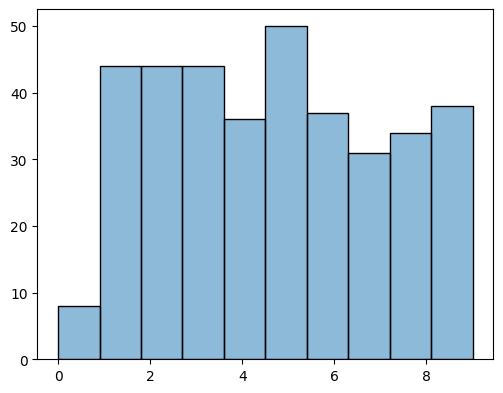

In [15]:
# Plot distribution of each digit
plt.figure(figsize=(20, 10))
for i, col in enumerate(digit_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cleaned_df[col], bins=10, kde=True)
    plt.title(f'Distribution of Digit {i}')
plt.tight_layout()
plt.show()

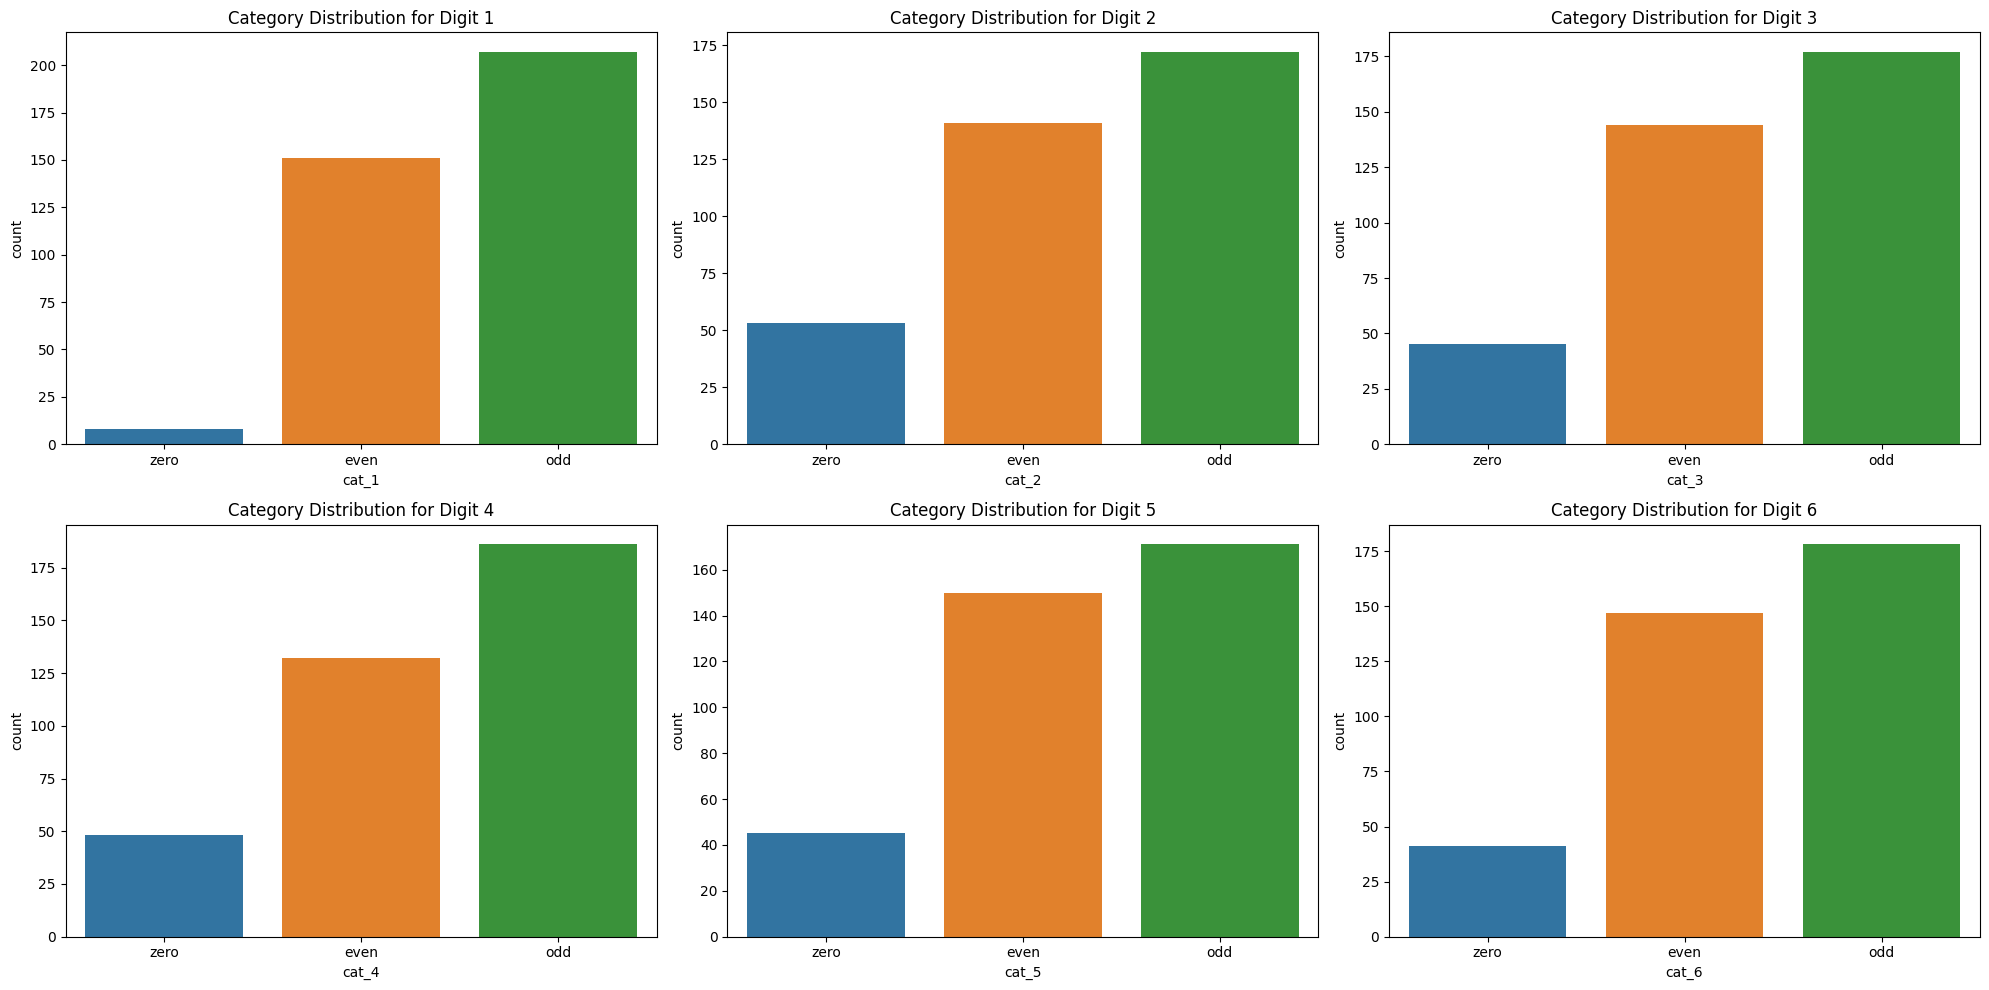

In [16]:
# Plot categorical distribution
plt.figure(figsize=(20, 10))
for i, col in enumerate([f'cat_{i}' for i in range(1, 7)], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=cleaned_df, order=['zero', 'even', 'odd'])
    plt.title(f'Category Distribution for Digit {i}')
plt.tight_layout()
plt.show()

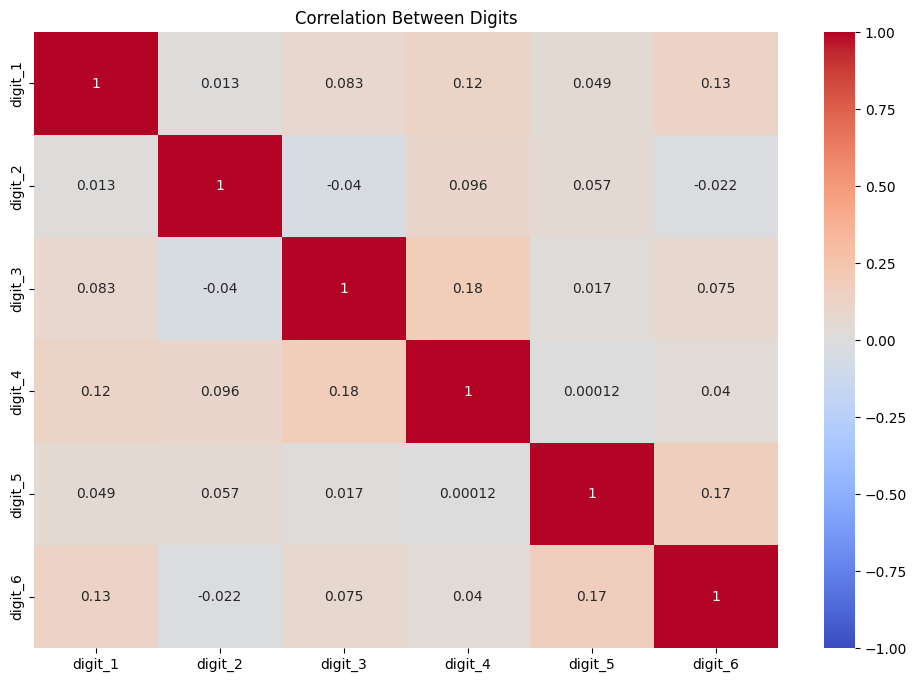

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = cleaned_df[digit_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Digits')
plt.show()

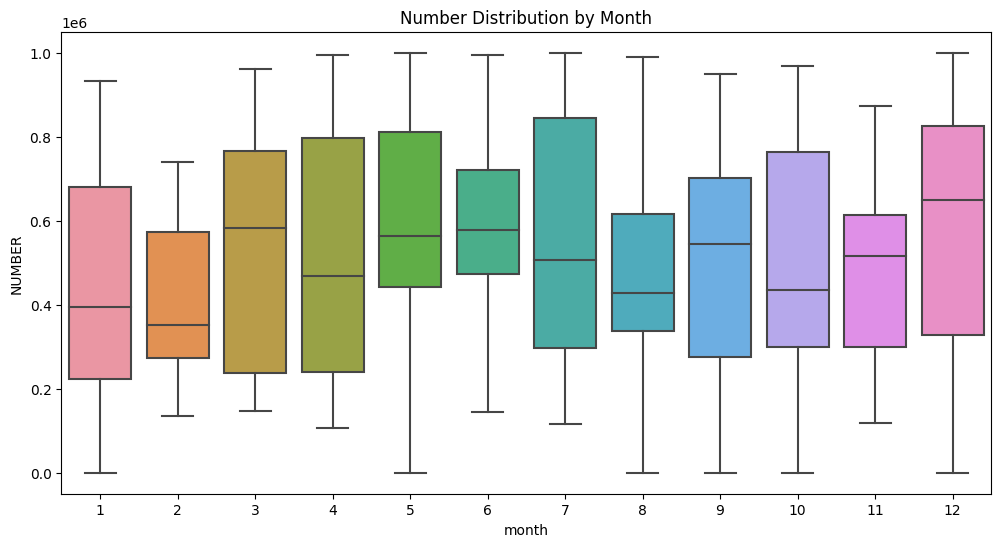

In [19]:
# Extract month and day
cleaned_df['month'] = cleaned_df['DATE'].dt.month
cleaned_df['day'] = cleaned_df['DATE'].dt.day

# Plot monthly patterns
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='NUMBER', data=cleaned_df)
plt.title('Number Distribution by Month')
plt.show()

In [21]:
from scipy.stats import chi2_contingency

# Chi-square test for independence between digits
for i in range(1, 7):
    for j in range(i+1, 7):
        contingency_table = pd.crosstab(cleaned_df[f'cat_{i}'], cleaned_df[f'cat_{j}'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square test between digit {i} and {j}: p-value = {p:.4f}")

Chi-square test between digit 1 and 2: p-value = 0.0000
Chi-square test between digit 1 and 3: p-value = 0.0000
Chi-square test between digit 1 and 4: p-value = 0.0000
Chi-square test between digit 1 and 5: p-value = 0.0000
Chi-square test between digit 1 and 6: p-value = 0.0000
Chi-square test between digit 2 and 3: p-value = 0.5087
Chi-square test between digit 2 and 4: p-value = 0.0411
Chi-square test between digit 2 and 5: p-value = 0.0210
Chi-square test between digit 2 and 6: p-value = 0.0086
Chi-square test between digit 3 and 4: p-value = 0.1994
Chi-square test between digit 3 and 5: p-value = 0.0009
Chi-square test between digit 3 and 6: p-value = 0.0746
Chi-square test between digit 4 and 5: p-value = 0.0165
Chi-square test between digit 4 and 6: p-value = 0.0000
Chi-square test between digit 5 and 6: p-value = 0.0070


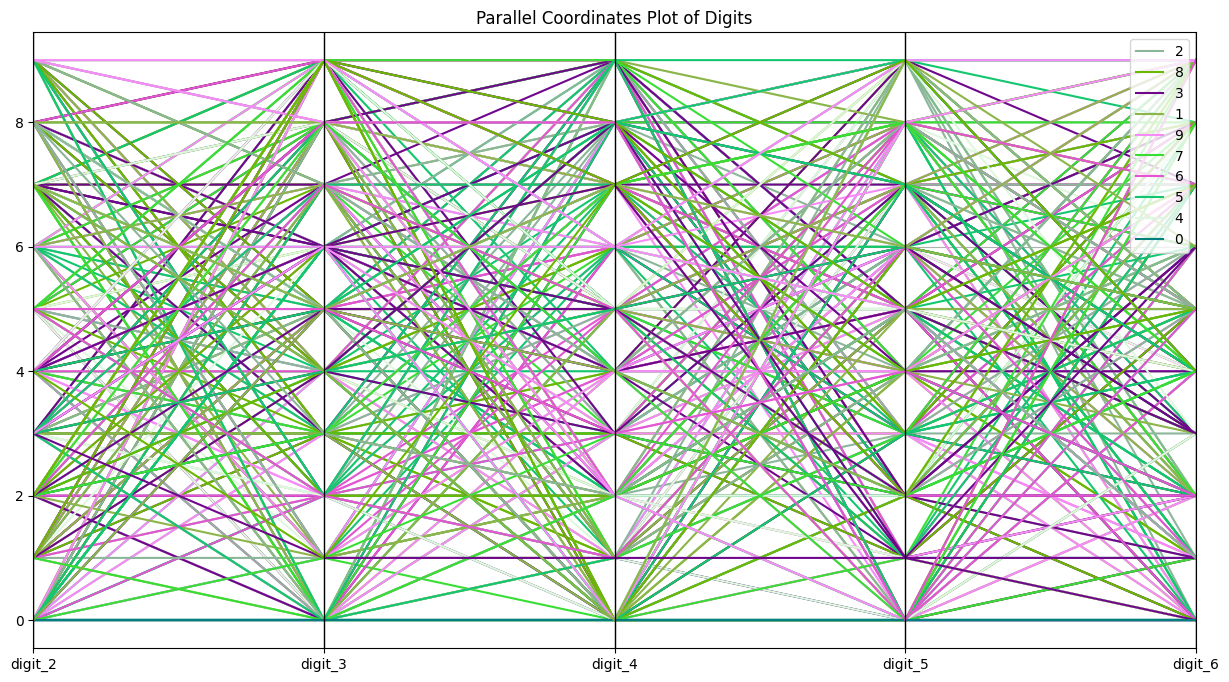

In [22]:
# Parallel coordinates plot
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(15, 8))
parallel_coordinates(cleaned_df[digit_columns], 'digit_1')
plt.title('Parallel Coordinates Plot of Digits')
plt.show()

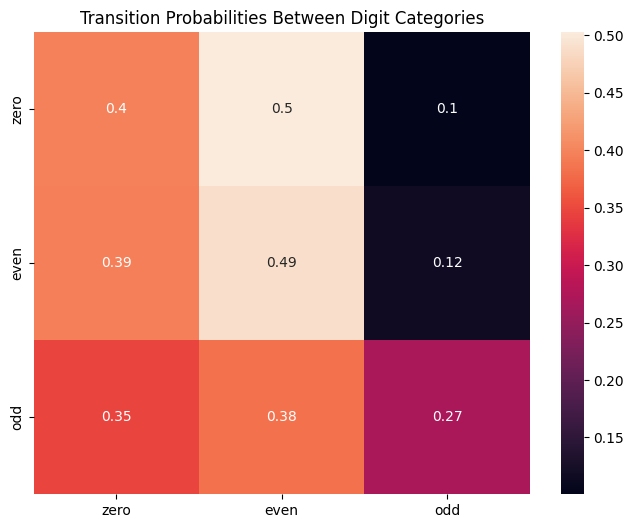

In [24]:
# Transition probabilities between digit categories
from sklearn.preprocessing import LabelEncoder

# Encode categories
le = LabelEncoder()
cat_cols = [f'cat_{i}' for i in range(1, 7)]
encoded_df = cleaned_df[cat_cols].apply(le.fit_transform)

# Transition matrix
transition_matrix = np.zeros((3, 3))
for i in range(5):  # Adjusted to avoid out-of-bounds access
    for j in range(len(cleaned_df)-1):
        current = encoded_df.iloc[j, i]
        next_val = encoded_df.iloc[j, i+1]
        transition_matrix[current, next_val] += 1

# Normalize and plot
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, 
            xticklabels=['zero', 'even', 'odd'], 
            yticklabels=['zero', 'even', 'odd'])
plt.title('Transition Probabilities Between Digit Categories')
plt.show()

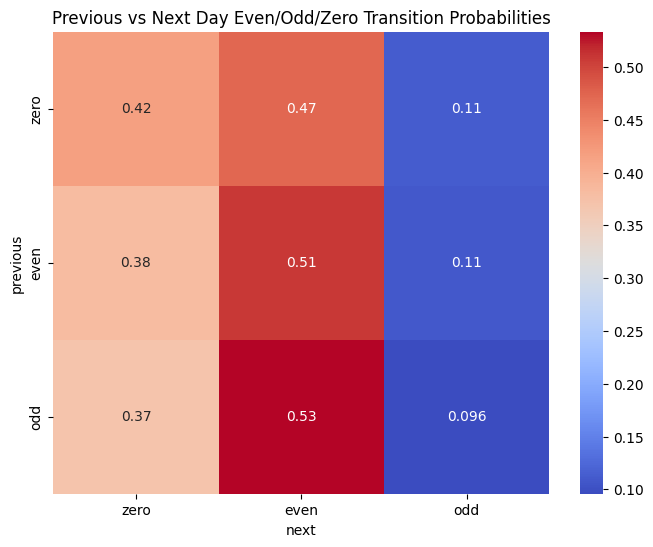

In [32]:
# Create a new DataFrame to store previous and next day categories
transition_df = pd.DataFrame({
    'previous': encoded_df.iloc[:-1, :].values.flatten(),
    'next': encoded_df.iloc[1:, :].values.flatten()
})

# Group by previous and next categories and count occurrences
transition_counts = transition_df.groupby(['previous', 'next']).size().unstack()

# Normalize and plot
transition_counts = transition_counts.div(transition_counts.sum(axis=1), axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(transition_counts, annot=True, cmap='coolwarm', 
            xticklabels=['zero', 'even', 'odd'], 
            yticklabels=['zero', 'even', 'odd'])
plt.title('Previous vs Next Day Even/Odd/Zero Transition Probabilities')
plt.show()

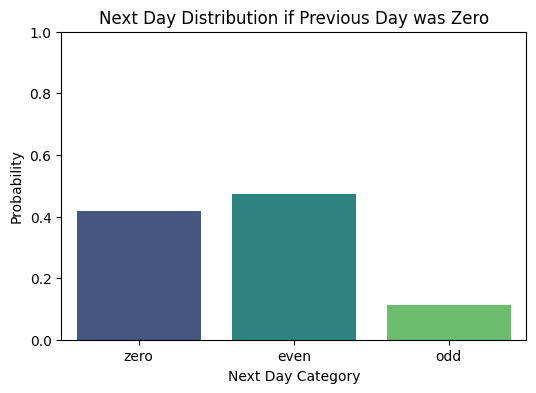

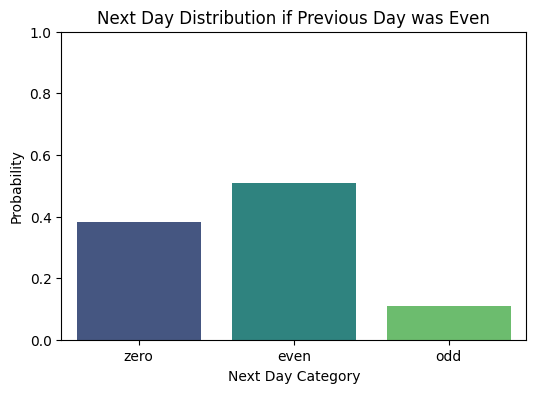

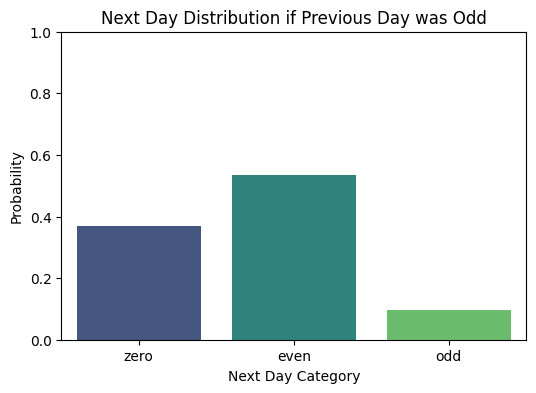

In [35]:
# Create a new DataFrame to store previous and next day categories
transition_data = []

# For each digit position (1-6)
for digit_pos in range(1, 7):
    # Get the current digit's categories
    current_digit = encoded_df.iloc[:-1, digit_pos-1]  # All but last day
    next_digit = encoded_df.iloc[1:, digit_pos-1]      # All but first day
    
    # Create transitions for this digit position
    for prev, next_val in zip(current_digit, next_digit):
        transition_data.append({
            'digit_position': digit_pos,
            'previous': prev,
            'next': next_val
        })

# Create DataFrame from transition data
transition_df = pd.DataFrame(transition_data)

# Map encoded values back to categories
category_map = {0: 'zero', 1: 'even', 2: 'odd'}
transition_df['previous'] = transition_df['previous'].map(category_map)
transition_df['next'] = transition_df['next'].map(category_map)

# Plot transition probabilities for each previous category
for prev_category in ['zero', 'even', 'odd']:
    # Filter transitions where previous day's category is the current one
    filtered_transitions = transition_df[transition_df['previous'] == prev_category]
    
    # Count occurrences of next day's categories
    next_counts = filtered_transitions['next'].value_counts(normalize=True)
    
    # Fill missing categories with 0 probability
    for cat in ['zero', 'even', 'odd']:
        if cat not in next_counts:
            next_counts[cat] = 0
    
    # Sort to maintain consistent order
    next_counts = next_counts.reindex(['zero', 'even', 'odd'])
    
    # Plot the distribution
    plt.figure(figsize=(6, 4))
    sns.barplot(x=next_counts.index, y=next_counts.values, palette='viridis')
    plt.title(f'Next Day Distribution if Previous Day was {prev_category.capitalize()}')
    plt.xlabel('Next Day Category')
    plt.ylabel('Probability')
    plt.ylim(0, 1)  # Set y-axis limit to 0-1 for probability
    plt.show()

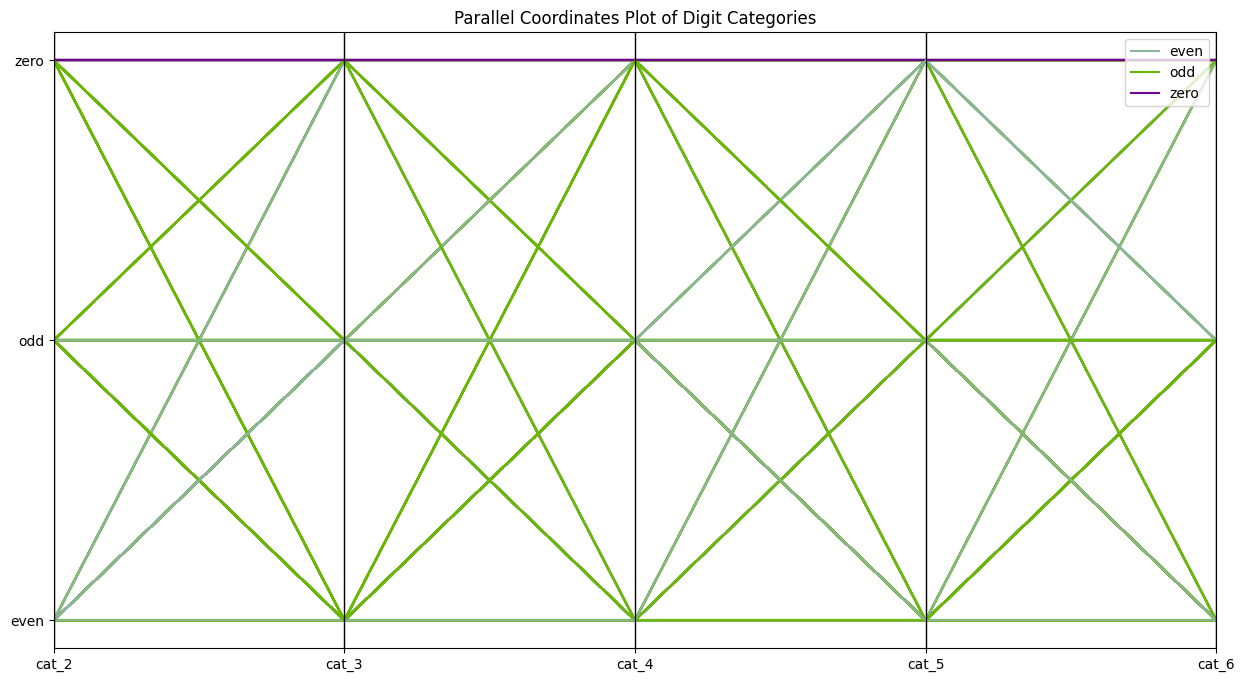

In [31]:
# Parallel coordinates plot
plt.figure(figsize=(15, 8))
parallel_coordinates(cleaned_df[cat_cols], 'cat_1')
plt.title('Parallel Coordinates Plot of Digit Categories')
plt.show()

In [36]:
from scipy.stats import chi2_contingency

# Chi-square test for independence between categories
chi_square_results = []
for i in range(1, 7):
    for j in range(i+1, 7):
        contingency_table = pd.crosstab(cleaned_df[f'cat_{i}'], cleaned_df[f'cat_{j}'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_square_results.append({
            'Digit 1': f'cat_{i}',
            'Digit 2': f'cat_{j}',
            'Chi-Square Statistic': chi2,
            'p-value': p,
            'Degrees of Freedom': dof
        })

# Convert results to a DataFrame for better visualization
chi_square_df = pd.DataFrame(chi_square_results)
print("Chi-Square Test Results:")
display(chi_square_df)

Chi-Square Test Results:


,Digit 1,Digit 2,Chi-Square Statistic,p-value,Degrees of Freedom
0,cat_1,cat_2,49.039657,5.728641e-10,4
1,cat_1,cat_3,59.927982,3.003731e-12,4
2,cat_1,cat_4,56.686924,1.439137e-11,4
3,cat_1,cat_5,58.420033,6.228767e-12,4
4,cat_1,cat_6,66.457637,1.268526e-13,4
5,cat_2,cat_3,3.301617,5.086760e-01,4
6,cat_2,cat_4,9.961971,4.107317e-02,4
7,cat_2,cat_5,11.556942,2.096880e-02,4
8,cat_2,cat_6,13.617115,8.622871e-03,4
9,cat_3,cat_4,5.996075,1.994416e-01,4
